# Lecture 8: Consistency, stability and convergence


**Consistency** is a condition on the *numerical scheme*, and implies that the *numerical scheme* should tend to the exact differential equation as $\Delta x$ and $\Delta t$ tend to zero.

**Stability** is a condition on the *numerical solution*, and states that all errors must remain bounded when the process advances.

**Convergence** is a condition on the *numerical solution*, and implies that the *numerical solution* must tend to the exact solution when time and space steps tend to zero.

We will examine how these three conditions affect our solution in the example below.




In [1]:
# Initialisation

%matplotlib inline

import matplotlib
from matplotlib import animation, rc
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.sparse import diags
from ipywidgets import *
from IPython.display import display, Markdown
rc('animation', html='jshtml')

## Linear advection

In this example, we look at the linear advection equation

$$ u_t + a_{} u_x = 0 $$

We consider the problem in the domain $x \in [0, L]$ and set $ a > 0 $. We then impose a periodic boundary condition

$$
u(0,t) = u(L,t)
$$

and the initial conditions

$$
u(x,0) = u_0 (x) =
\begin{cases}
\sin \left(\frac{2 \pi x}{L}\right) & \text{if $x \in \left(0, \frac{L}{2}\right)$} \\
0 & \text{otherwise}
\end{cases}
$$

We know that the analytical solution to the linear advection equation is

$$
u(x,t) = u_0(x-at)
$$

We now plot out this analytical solution.

In [2]:
# Variables
L = 1
a = 1
dx = 0.025
dt = 0.01

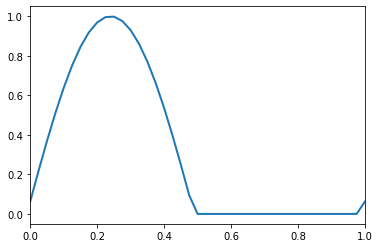

In [3]:
# Initialise arrays and equations
x = Symbol('x')
xl = np.append(np.arange(0,L,dx),[1])
u0 = Piecewise((0, x < 0), (sin(2*np.pi*x/L), x <= L/2), (0, True))
uc = np.array([u0.subs(x,xi) for xi in xl])

# Initialise plotting
fig = plt.figure()
ax = plt.axes(xlim=(0,L))
line, = ax.plot(xl,uc,lw=2)

def update(i):
    uc = np.array([u0.subs(x, L*frac((xi-a*dt*i)/L)) for xi in xl])
    p = line.set_data(xl, uc)
    return line,

anim1 = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)
anim1

## Numerical solution (backward difference)

We now consider a numerical scheme with a backward difference in space / Euler forward in time approximation:

$$ \frac{u_i^{n+1} - u_i^n}{\Delta t} + a\frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

## Consistency

The truncation error $\varepsilon_T$ is defined as the difference between the exact and the numerical equation.
 
We can show that the solution of the numerical equation satisfies:

$$
\left(\bar{u}_t + a \bar{u}_x \right)|^n_i = -\frac{\Delta t}{2}\bar{u}_{tt}|^n_i + \frac{\Delta x}{2}\bar{u}_{xx}|^n_i + O\left(\Delta t^2, \Delta x^2\right)
$$

We thus know that this scheme is first-order accurate in both time and space, i.e. $\varepsilon_T = O(\Delta t, \Delta x)$

We can also then derive the modified equation:

$$
\left(\bar{u}_t + a \bar{u}_x \right)|^n_i = \frac{a \Delta x}{2} \left( 1 - \frac{a \Delta t}{\Delta x}  \right) \bar{u}_{xx}|^n_i + O\left(\Delta t^2, \Delta x^2\right)
$$


## Stability

Presenting our numerical scheme as

$$ \mathbf{u}^{n+1} = \mathbf{C} \mathbf{u}^n $$

where $\mathbf{C}$ is the evolution matrix, derived from the linear advection equation

$$ u_i^{n+1} = (1-\lambda)u_i^n + \lambda u_{i-1}^n $$

From induction we can then see

$$ \mathbf{u}^{n+1} = \mathbf{C}^n \mathbf{u}^0 $$

where

$$
C = 
\begin{bmatrix} 
 1-\lambda & & & & \lambda\\
 \lambda & 1-\lambda & & & \\
 & \lambda & 1-\lambda & & \\
 & & \ddots & \ddots & \\
 & & & \lambda & 1-\lambda \\
\end{bmatrix}
$$

where $1-\lambda$ is on the main diagonal. Then, to investigate stability, we require

$$ |u_i^n| \leq \max_{j} |u_j^0| \quad \text{for all } i $$

Thus, we diagonalise the equation such that

$$  \mathbf{u}^{n+1} = \mathbf{C}^n \mathbf{u}^0 = \mathbf{V}^{-1} \mathbf{D}^n \mathbf{V} \mathbf{u}^0$$

We can thus calculate the eigenvalues $\lambda_i = D_{ii}$. For stability, we require $|\lambda_i| \leq 1$ for all eigenvalues $\lambda_i$ of $C$.

In [4]:
l = a*dt/dx
N = np.size(xl) - 1;
C = diags([(np.ones(N)*(1-l)).tolist(), (np.ones(N-1)*l).tolist(), [l]], [0, -1, N-1]).toarray()

# Eigenvalues
w, _ = np.linalg.eig(C)
display(w)
display(Markdown('All $|\lambda_i| \leq 1$.')) if filter(lambda w: abs(w) > 1, w) else display(Markdown('Not all $|\lambda_i| \leq 1$.'))

array([0.2       +0.j        , 0.20492466+0.06257379j,
       0.20492466-0.06257379j, 0.21957739+0.1236068j ,
       0.21957739-0.1236068j , 0.24359739+0.1815962j ,
       0.24359739-0.1815962j , 0.2763932 +0.2351141j ,
       0.2763932 -0.2351141j , 0.31715729+0.28284271j,
       0.31715729-0.28284271j, 0.3648859 +0.3236068j ,
       0.3648859 -0.3236068j , 0.4184038 +0.35640261j,
       0.4184038 -0.35640261j, 0.4763932 +0.38042261j,
       0.4763932 -0.38042261j, 0.53742621+0.39507534j,
       0.53742621-0.39507534j, 0.6       +0.4j       ,
       0.6       -0.4j       , 0.66257379+0.39507534j,
       0.66257379-0.39507534j, 0.7236068 +0.38042261j,
       0.7236068 -0.38042261j, 0.7815962 +0.35640261j,
       0.7815962 -0.35640261j, 0.8351141 +0.3236068j ,
       0.8351141 -0.3236068j , 0.88284271+0.28284271j,
       0.88284271-0.28284271j, 0.9236068 +0.2351141j ,
       0.9236068 -0.2351141j , 1.        +0.j        ,
       0.99507534+0.06257379j, 0.99507534-0.06257379j,
       0.9

All $|\lambda_i| \leq 1$.

We also note from the modified equation derived earlier:

$$
\left(\bar{u}_t + a \bar{u}_x \right)|^n_i = \frac{a \Delta x}{2} \left( 1 - \frac{a \Delta t}{\Delta x}  \right) \bar{u}_{xx}|^n_i + O\left(\Delta t^2, \Delta x^2\right)
$$

If the numerical viscosity coefficient is positive, it will damp oscillations and strong gradients. Conversely, if it is negative, any disturbance will be amplified exponentially, resulting in instability. Thus, for stability, we should have

$$
0 \leq \frac{a \Delta t}{\Delta x} \leq 1
$$

which requires $a > 0$ and $\lambda = a \Delta t / \Delta x \leq 1$, which is the CFL condition.

In [5]:
ld = a*dt/dx

display(Markdown(r'The CFL condition $\lambda = %0.2f $' % ld))

The CFL condition $\lambda = 0.40 $

## Convergence

By considering the Lax Equivalence Theorem, we only have to analyse the consistency condition and the stability properties to establish convergence without additional analysis.

We now plot our numerical solution for comparison.

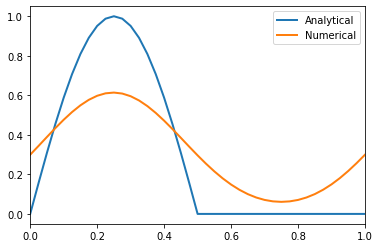

In [6]:
uc = np.array([u0.subs(x,xi) for xi in xl])
ub = np.array([u0.subs(x,xi) for xi in xl])

# Edit C to also plot point x=0 at x=1
C1 = np.hstack((np.vstack((C,C[0])),np.transpose([np.zeros(N+1)])))

# Initialise plotting
fig2 = plt.figure()
ax2 = plt.axes(xlim=(0,L))
line1, = ax2.plot(xl,uc,lw=2)
line2, = ax2.plot(xl,ub,lw=2)
lines = [line1, line2,]
plt.legend(['Analytical', 'Numerical'], loc='upper right')

def update2(i):
    global ub
    uc = np.array([u0.subs(x, L*frac((xi-a*dt*(i+1))/L)) for xi in xl]) # +1 for alignment
    ub = np.dot(C1,ub)
    p1 = lines[0].set_data(xl, uc)
    p2 = lines[1].set_data(xl, ub)
    return lines

def init2():
    return lines

anim2 = animation.FuncAnimation(fig2, update2, init_func=init2, frames=200, interval=100, blit=True)
anim2

We can also examine the convergence of the solution with varying values of $\lambda$. In the example below, we examine both the analytical solution and the numerical solution at a specified timestep $i$ for varying values of $\lambda$ (with fixed $a$ and $\Delta t$).

In [7]:
def compute(l=0.4, i=0):
    # Initialise numerical solution
    adt = 0.01
    dx = adt/l
    xl = np.append(np.arange(0,L,dx),[1])
    ub = np.array([u0.subs(x,xi) for xi in xl])
    N = np.size(xl) - 1;
    C = diags([(np.ones(N)*(1-l)).tolist(), (np.ones(N-1)*l).tolist(), [l]], [0, -1, N-1]).toarray()
    C = np.hstack((np.vstack((C,C[0])),np.transpose([np.zeros(N+1)])))
    
    # Fastforward to timestep
    uc = np.array([u0.subs(x, L*frac((xi-adt*(i))/L)) for xi in xl])
    ub = np.dot(np.linalg.matrix_power(C, i),ub)

    # Plotting
    fig3 = plt.figure()
    ax3 = plt.axes(xlim=(0,L))
    line1, = ax3.plot(xl,uc,lw=2)
    line2, = ax3.plot(xl,ub,lw=2)
    plt.legend(['Analytical', 'Numerical'], loc='upper right')
    

interact1 = interact(compute,
                     l = FloatSlider(min=0.05,max=1,step=0.05,description=r'$\lambda$',continuous_update=False),
                     i = IntSlider(min=0,max=1000,step=25,description=r'Timestep $i$',continuous_update=False)
                    )


interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='$\\lambda$', max=1.0, min=…